# 2. EDA

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load master dataset
user_features = pd.read_csv("user_features.csv")

Data was cleaned, duplicates removed, missing values imputed, and features engineered into user_features.csv.
We will now explore the cleaned dataset to understand which features drive churn and how they differ between active and churned users.

In [67]:
print(user_features.head())
print(user_features["churn"].value_counts())

# Set Seaborn style
sns.set(style="whitegrid", palette="Set2")

      user_id                      email first_name last_name   age  gender  \
0  user_00001   figueroajohn@example.org      Erica     Garza  43.0    Male   
1  user_00002      blakeerik@example.com     Joshua   Bernard  38.0    Male   
2  user_00003        smiller@example.net    Barbara  Williams  32.0  Female   
3  user_00004  mitchellclark@example.com    Chelsea  Ferguson  11.0    Male   
4  user_00005      richard13@example.net      Jason    Foster  21.0  Female   

  country state_province                city subscription_plan  ...  \
0     USA  Massachusetts  North Jefferyhaven             Basic  ...   
1     USA          Texas      North Noahstad          Premium+  ...   
2     USA       Michigan          Traciebury          Standard  ...   
3     USA           Ohio          South Noah          Standard  ...   
4     USA        Arizona         West Donald          Standard  ...   

  search_count  avg_results_returned  click_rate avg_search_duration  \
0          1.0            

### Identify ML Model Requirements

In [16]:
# Prediction target
print(user_features["churn"].value_counts(normalize=True))

churn
0    0.8519
1    0.1481
Name: proportion, dtype: float64


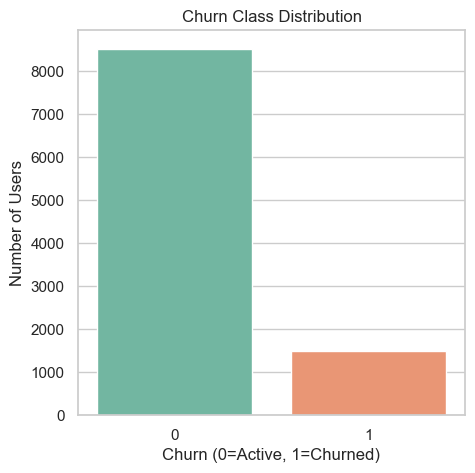

In [36]:
# Visualize class imbalance 
plt.figure(figsize=(5,5))
sns.countplot(data=user_features, x="churn", hue="churn", palette="Set2", legend=False)
plt.title("Churn Class Distribution")
plt.xlabel("Churn (0=Active, 1=Churned)")
plt.ylabel("Number of Users")
plt.show()

- The dataset is imbalanced: about 85% of users are active (0) and only 15% churned (1). 
- This imbalance means that we will need to adjust our models for training to avoid bias when predicting non-churn. Techniques such as resampling or class weights may be applied to ensure fair learning across both categories.
B- ecause churn is a minority class, the models must prioritize catching churners (recall) rather than just maximizing overall accuracy.

## Distributions by churn

### Tenure

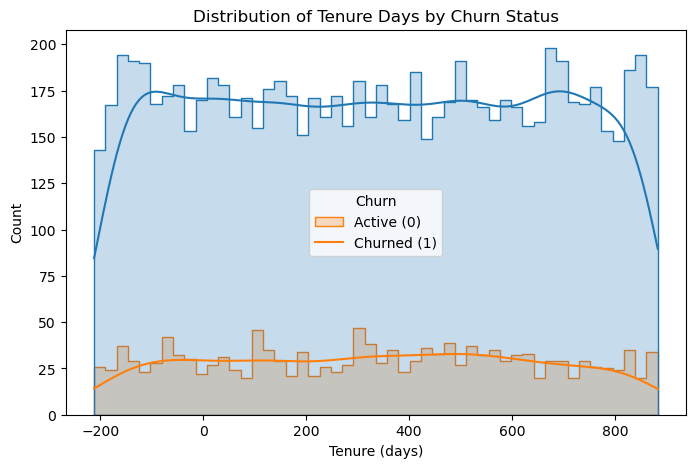

In [56]:
plt.figure(figsize=(8,5))
sns.histplot(data=user_features, x="tenure_days", hue="churn", bins=50, kde=True, element="step")
plt.title("Distribution of Tenure Days by Churn Status")
plt.xlabel("Tenure (days)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Active (0)", "Churned (1)"])
plt.show()

Users with shorter tenure are much more likely to churn. Churn stabilizes among longer-tenure subscribers.

### Monthly spend 

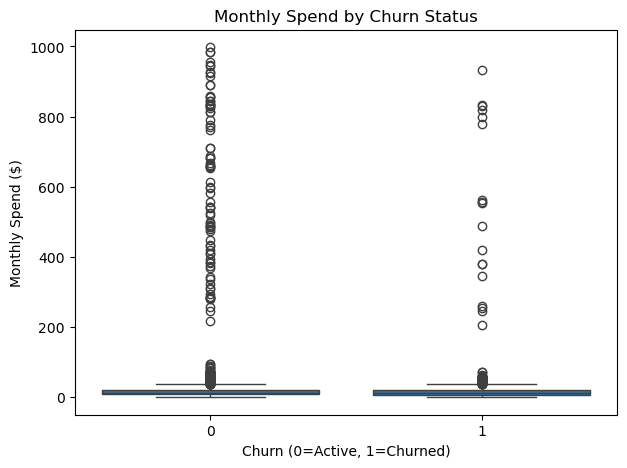

In [52]:
plt.figure(figsize=(7,5))
sns.boxplot(data=user_features, x="churn", y="monthly_spend")
plt.title("Monthly Spend by Churn Status")
plt.xlabel("Churn (0=Active, 1=Churned)")
plt.ylabel("Monthly Spend ($)")
plt.show()

There is no clear separation between churners and active users, so this feature alone is not predictive.

### Total watch time 

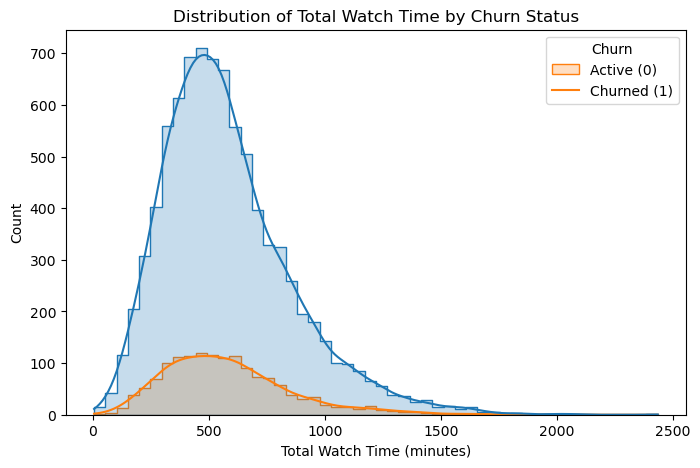

In [54]:
plt.figure(figsize=(8,5))
sns.histplot(data=user_features, x="total_watch_time", hue="churn", bins=50, kde=True, element="step")
plt.title("Distribution of Total Watch Time by Churn Status")
plt.xlabel("Total Watch Time (minutes)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["Active (0)", "Churned (1)"])
plt.show()

Users with lower total watch time are much more likely to churn, while heavy watchers tend to remain active.

### Search activity 

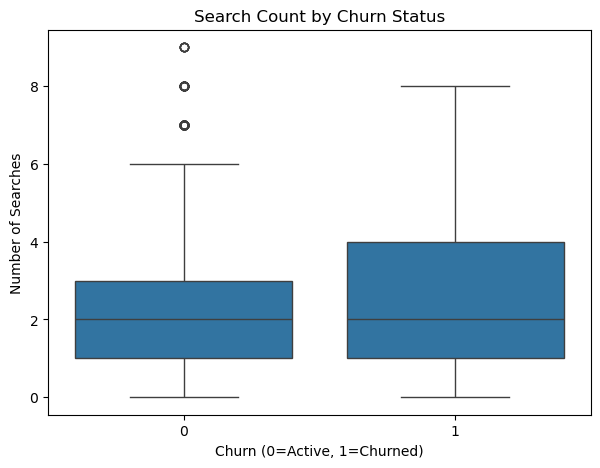

In [69]:
plt.figure(figsize=(7,5))
sns.boxplot(data=user_features, x="churn", y="search_count")
plt.title("Search Count by Churn Status")
plt.xlabel("Churn (0=Active, 1=Churned)")
plt.ylabel("Number of Searches")
plt.show()

Fewer searches are linked to higher churn. It means that users who actively explore content are linked to retention.

### Completion rate 

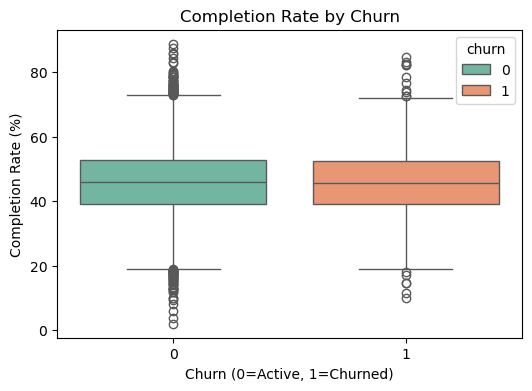

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(data=user_features, x="churn", y="completion_rate", hue = "churn", palette="Set2")
plt.title("Completion Rate by Churn")
plt.xlabel("Churn (0=Active, 1=Churned)")
plt.ylabel("Completion Rate (%)")
plt.show()

Users with lower content completion are more likely to churn, suggesting that satisfaction and/or the relevance of the recommendations matters.

Together, these patterns highlight that engagement (watching, searching, completing content) is a far stronger predictor of churn than simple spend.

## Churn by demographics

 ### Subscription plan

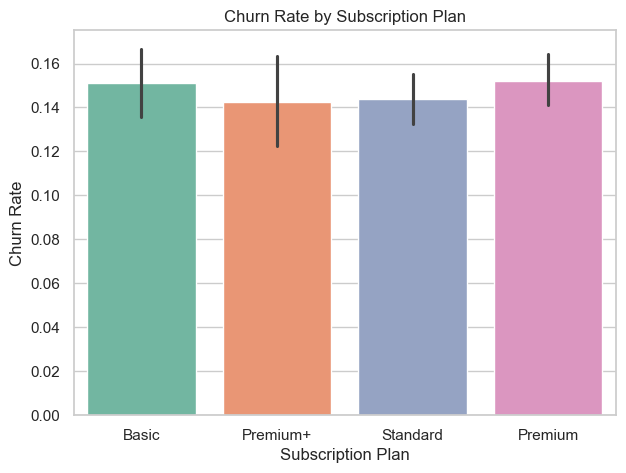

In [31]:
plt.figure(figsize=(7,5))
sns.barplot(data=user_features, x="subscription_plan", y="churn", hue="subscription_plan", palette="Set2", legend=False)
plt.title("Churn Rate by Subscription Plan")
plt.xlabel("Subscription Plan")
plt.ylabel("Churn Rate")
plt.show()

Churn rates are relatively consistent across subscription plans, ranging between 14% and 15%. This indicates that subscription alone is not a strong predictor of churn and that other behavioral factors may play a more important role.

### Gender

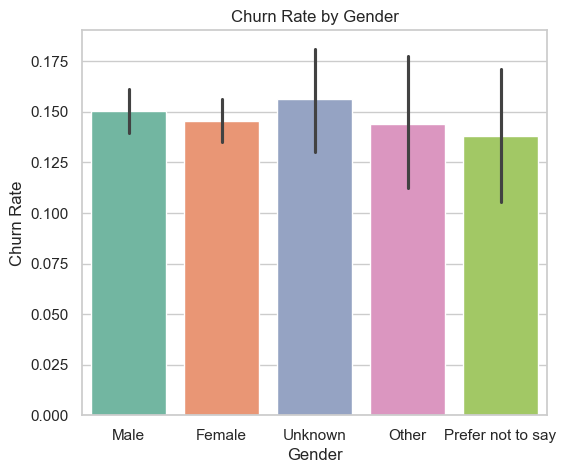

In [35]:
plt.figure(figsize=(6,5))
sns.barplot(data=user_features, x="gender", y="churn", hue="gender", palette="Set2", legend=False)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate")
plt.show()

Gender has minimal impact on churn.

This suggests churn is not primarily driven by demographics but rather by how users interact with the platform.

## Pairwise relationships 

In [18]:
# Helpful palette and style
sns.set(style="whitegrid", palette="Set2")

# --- 0) (Optional) Create log-scaled copies for skewed features
for col in ["total_watch_time", "search_count", "avg_watch_time"]:
    if col in user_features.columns:
        user_features[f"log1p_{col}"] = np.log1p(user_features[col])

### Monthly spend vs watch time

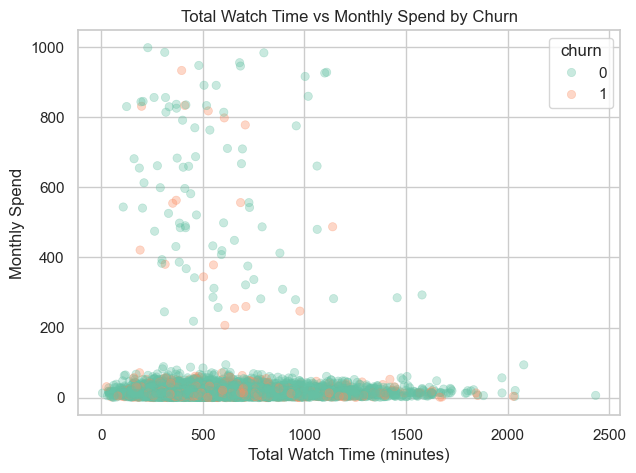

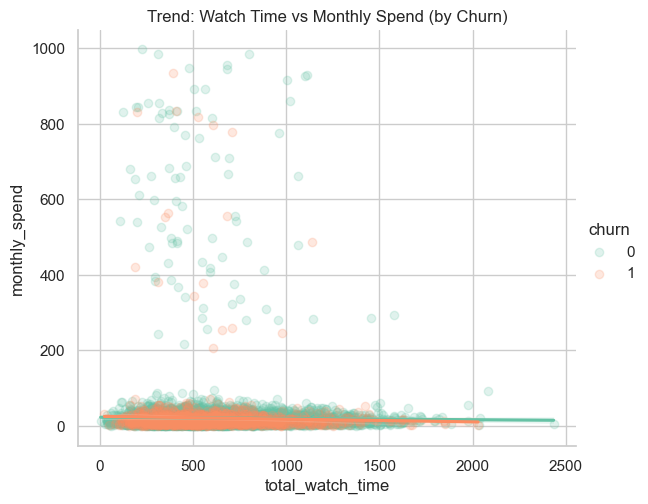

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=user_features,
    x="total_watch_time", y="monthly_spend",
    hue="churn", alpha=0.35, edgecolor=None
)
plt.title("Total Watch Time vs Monthly Spend by Churn")
plt.xlabel("Total Watch Time (minutes)")
plt.ylabel("Monthly Spend")
plt.show()

# Optional trend lines (separate by churn)
sns.lmplot(
    data=user_features,
    x="total_watch_time", y="monthly_spend",
    hue="churn", height=5, aspect=1.2, scatter_kws={"alpha":0.2}
)
plt.title("Trend: Watch Time vs Monthly Spend (by Churn)")
plt.show()

As expected, users who watch more also tend to spend more. This reinforces the earlier finding that engagement is the key driver of retention, while also showing that spend and engagement work together.

### Search Activity vs Click-Through Rate (CTR)

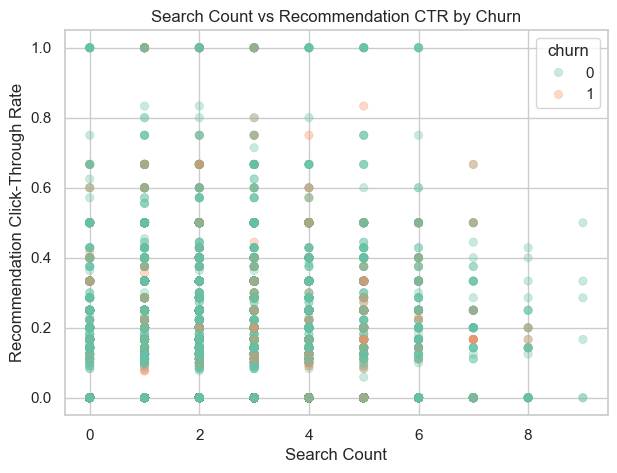

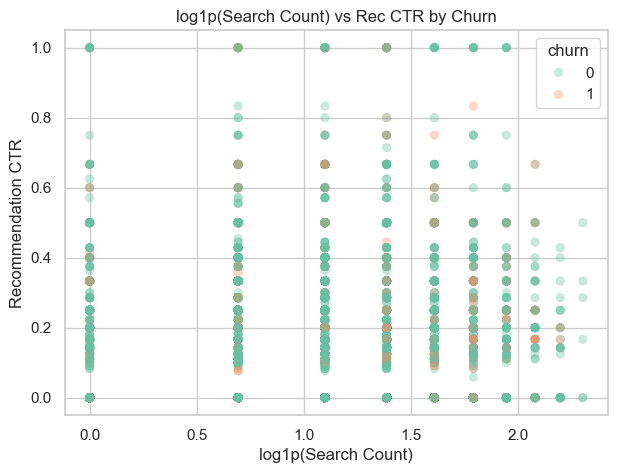

In [58]:
# Make sure columns exist 
if {"search_count", "rec_ctr"}.issubset(user_features.columns):
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        data=user_features,
        x="search_count", y="rec_ctr",
        hue="churn", alpha=0.35, edgecolor=None
    )
    plt.title("Search Count vs Recommendation CTR by Churn")
    plt.xlabel("Search Count")
    plt.ylabel("Recommendation Click-Through Rate")
    plt.show()

# Use log scale when counts are unevenly distributed
    if "log1p_search_count" in user_features.columns:
        plt.figure(figsize=(7,5))
        sns.scatterplot(
            data=user_features,
            x="log1p_search_count", y="rec_ctr",
            hue="churn", alpha=0.35, edgecolor=None
        )
        plt.title("log1p(Search Count) vs Rec CTR by Churn")
        plt.xlabel("log1p(Search Count)")
        plt.ylabel("Recommendation CTR")
        plt.show()

A positive trend is also visible between search activity and CTR. Users who search more tend to engage more with recommendations, suggesting that discovery features (search and recommendations) protect against churn. Low search activity combined with low CTR is a strong risk signal.

## Correlation

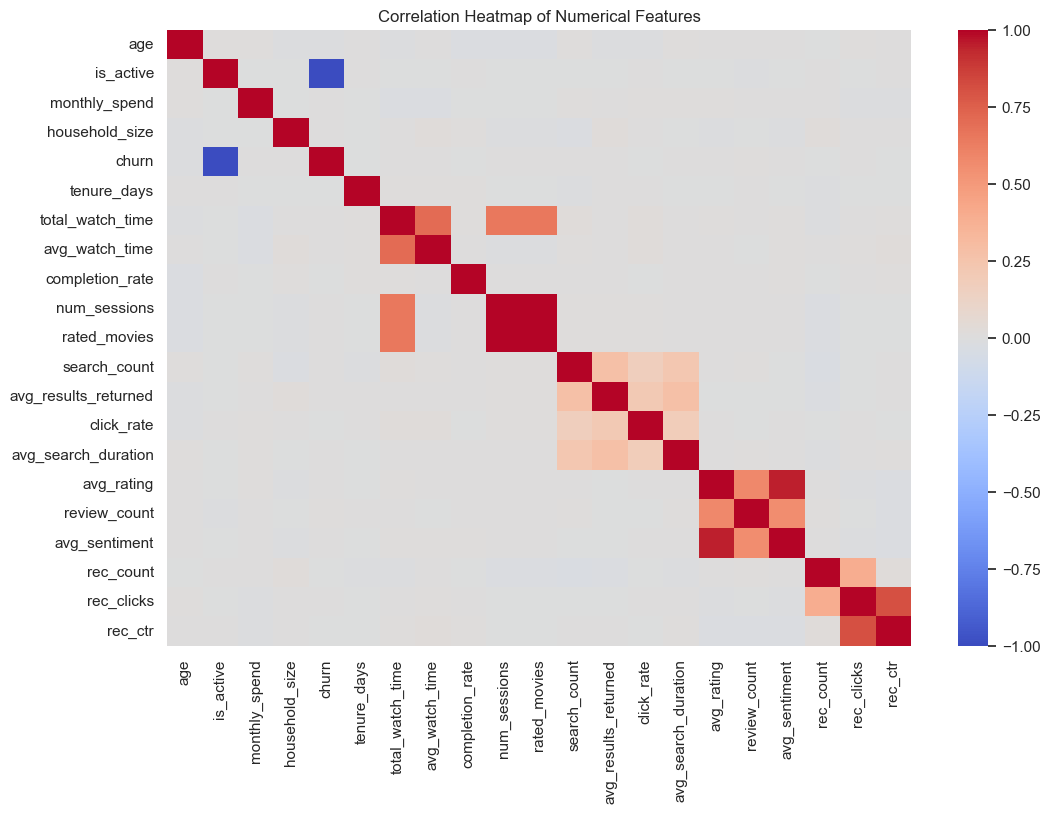

In [76]:
# Correlation heatmap
plt.figure(figsize=(12,8))
corr = user_features.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

There are strong correlations between watch-related features: total watch time, average watch time and completion rate.
Total watch time and average watch time per session are almost identical. Since they overlap heavily, the model doesn’t need both: keeping just one will make predictions simpler and more reliable.

## Summary

This exploratory analysis of Netflix churn shows that user **engagement** is the strongest driver of retention, outweighing the influence of demographics or subscription tier.

- **Tenure**: Churn is highest among new users, highlighting the need for stronger onboarding and early engagement.

- **Engagement**: Low watch time, limited search activity and unfinished viewing are clear indicators of churn risk.

- **Spend**: Monthly spend alone does not distinguish churners but in combination with engagement it adds predictive value.

- **Discovery**: Users who actively search and click on recommendations are more likely to stay, underscoring the importance of discovery features.

- **Correlation**: total_watch_time and avg_watch_time are highly redundant. Removing one will simplify modeling.

From a **business** perspective, the findings emphasize focusing **retention strategies** on **early user engagement**, **discovery features** and encouraging **content completion**, rather than relying on subscription. 